# Part 2a annotation 

In this notebook cells in the allntova dataset are assigned to prior annotated reference states from multiple reference scRNA-seq datasets. In addition, single-cell expression of known marker genes from different cell states are plotted (Fig. 1C, 4A, 4C, 5A, 6E, S1D, & S5A). In this way, cell states can be identified in the UMAP from the allntova dataset and annotated by unsupervised clustering in part 2b annotation. Reference datasets used: 
- Miller et al., 2019 (both tumor & LCMV): https://doi.org/10.1038/s41590-019-0312-6
- Zilionis et al., 2019 (from our lab): https://doi.org/10.1016/j.immuni.2019.03.009
- Maier et al., 2020: https://doi.org/10.1038/s41586-020-2134-y
- Zhang et al., 2020 (only MC38 tumors): https://doi.org/10.1016/j.cell.2020.03.048
- ImmGen consortium: http://www.immgen.org

In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import glob
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import mm_functions_14_10_2020 as mm

In [2]:
# Set figure parameters 
mylines = 0.15*2.82 # the number 2.82 is the difference
					# between Illustrator 1 pt and python 1 pt.
mpl.rcParams['axes.linewidth'] = mylines # default 1
mpl.rcParams['ytick.direction'] = 'out' # default 'in'
mpl.rcParams['xtick.direction'] = 'out' # default 'in'
mpl.rcParams['xtick.major.size'] = 2 # default 4
mpl.rcParams['ytick.major.size'] = 2 # default 4
mpl.rcParams['xtick.major.width'] = mylines # default 0.5
mpl.rcParams['ytick.major.width'] = mylines # default 0.5
mpl.rcParams['grid.linewidth'] = mylines/1.5 # default 0.5
mpl.rcParams['grid.color'] = '0.8' # default 'k'
mpl.rcParams['grid.linestyle'] = 'solid'# default ':'
mpl.rcParams['legend.frameon'] = False # default True
mpl.rcParams['figure.dpi']= 300
mpl.rc("savefig", dpi=300)
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

## Load adatas

In [5]:
# Create a path dict to .h5ad backups reference dataset 
keys = [path.split('_')[1] for path in glob.glob('/Users/mariusmessemaker/Documents/Project/mempel/backups/adata_*.h5ad')]
values = glob.glob('/Users/mariusmessemaker/Documents/Project/mempel/backups/adata_*.h5ad')
adataPathDict = dict(zip(keys, values))

In [6]:
adataPathDict

{'miller': '/Users/mariusmessemaker/Documents/Project/mempel/backups/adata_miller_05202020.h5ad',
 'zilionis': '/Users/mariusmessemaker/Documents/Project/mempel/backups/adata_zilionis_05202020.h5ad',
 'maier': '/Users/mariusmessemaker/Documents/Project/mempel/backups/adata_maier_05202020.h5ad',
 'zhangcd40': '/Users/mariusmessemaker/Documents/Project/mempel/backups/adata_zhangcd40_05202020.h5ad',
 'millerlcmv': '/Users/mariusmessemaker/Documents/Project/mempel/backups/adata_millerlcmv_05202020.h5ad',
 'allntova': '/Users/mariusmessemaker/Documents/Project/mempel/backups/adata_allntova_05302020.h5ad'}

In [7]:
# Reload adatas into dict  
adata = {key:sc.read_h5ad(value) for key, value in adataPathDict.items()}

/Users/mariusmessemaker/miniconda3/envs/py36-sc/lib/python3.6/site-packages/anndata/_core/anndata.py:119: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [8]:
# Check dimensions
for dataset in adata.keys():
    print(dataset)
    print(adata[dataset].shape)

miller
(4313, 13880)
zilionis
(15939, 28205)
maier
(1468, 27933)
zhangcd40
(119698, 15243)
millerlcmv
(9194, 27998)
allntova
(8757, 20679)


In [9]:
adata['zhangcd40'] = mm.filter_cells_adata(adata['zhangcd40'], 
                                           col1 = 'State', flist1 = ['mL03_Doublet'], isnot1 = True, 
                                           col2 = 'Tissue', flist2 = ['Tumor'], 
                                           col3 = 'Treatment', flist3 = ['Isotype'], 
                                           return_filtered = True)

119607 cells will survive State filtering.
51252 cells will survive Tissue filtering.
66931 cells will survive Treatment filtering.
28374 cells will survive all filters.

Shape before filtering: (119698, 15243)


/Users/mariusmessemaker/miniconda3/envs/py36-sc/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


Shape after filtering: (28374, 15243) 

State unique values after filtering: ['mB01_BCell-Cd79b', 'mM03_pDC-Siglech', 'mM04_cDC2-Cd209a', 'mI01_NK-Klrb1c', 'mT04_CD4_Treg-Foxp3', 'mT03_CD4_Th-Bhlhe40', 'mL01_NKT-Cd163l1', 'mT08_CD8_Tcm-Ifit3', 'mT06_CD4_Tcm-Tcf7', 'mT01_CD4_Tn-Lef1', 'mT07_CD8_Tn-Ccr7', 'mT11_CD8_Tex-Lag3', 'mL02_IEL-Cd7', 'mT02_CD4_Tcm-Ifit3', 'mT05_CD4_Tfh-Cxcr5', 'mT12_CD8_Tex-Mki67', 'mT10_CD8_Trm-Cxcr6', 'mT09_CD8_Tem-Ccl5', 'mM10_Mono-Itgal', 'mM11_Macro-Mafb', 'mM14_Macro-Mgl2', 'mM09_Mono-Nr4a1', 'mM01_Mast-Cpa3', 'mM08_Mono-Ly6c2', 'mM06_cDC1-Clec9a', 'mM02_Neutrophil-Csf3r', 'mM07_cDC1-Ccl22', 'mM13_Macro-Ccl12', 'mM15_Macro-Vegfa', 'mM12_Macro-Maf', 'mM05_cDC2-Itgax'] 

Tissue unique values after filtering: ['Tumor'] 

Treatment unique values after filtering: ['Isotype'] 



## For all datasets, create an outlier filter gmask 

In [10]:
gmask = {}
for dataset in adata.keys():
    print(dataset)
    min_counts = 1 * adata[dataset].X.sum(1).mean()/1e4
    gmask[dataset] = mm.gmask_outlier_genes(adata[dataset], min_counts = min_counts, min_cells = 5)

miller
11840 genes are expressed in at least 5 cells with at least more than 1.08636943359375 counts per cell

zilionis
26643 genes are expressed in at least 5 cells with at least more than 0.2434620849609375 counts per cell

maier
11475 genes are expressed in at least 5 cells with at least more than 0.80491103515625 counts per cell

zhangcd40
14538 genes are expressed in at least 5 cells with at least more than 0.58640400390625 counts per cell

millerlcmv
12771 genes are expressed in at least 5 cells with at least more than 0.322316796875 counts per cell

allntova
17837 genes are expressed in at least 5 cells with at least more than 0.10588819580078125 counts per cell



## Load ImmGen dataset

In [9]:
# ImmGen references profiles were downloaded from Table S7 from Zilionis et al., 2019:
# https://ars.els-cdn.com/content/image/1-s2.0-S1074761319301268-mmc7.zip
# Preprocessed immgen data, code for preprocessing, and classifier code also available on github:
# rapolaszilionis/bayesian_classifier
immgen = pd.read_excel('/Users/mariusmessemaker/Documents/Project/Marie/tox/Table_S7.xlsx', sheet_name = 1, index_col = 0, skiprows = 3)

In [10]:
immgen

,SC_LTSL_BM,SC_STSL_BM,SC_LTSL_FL,SC_STSL_FL,SC_MPP34F_BM,SC_ST34F_BM,SC_CMP_BM_DR,SC_MEP_BM,SC_GMP_BM,SC_CDP_BM,...,EO_AT_v2,Eo_BL_v2,MC_Tr,MC_To,MC_Sk,MC_PC,MC_Es,MC_digest_PC,BA_Sp,BA_Bl
0610007C21Rik,61.99,72.90,82.54,74.85,80.91,76.30,86.65,64.56,132.78,114.41,...,72.39,49.81,113.40,95.43,107.02,158.87,107.52,187.15,98.70,102.66
0610007L01Rik,104.46,102.38,108.72,108.72,104.42,111.69,139.07,141.16,220.25,135.14,...,126.39,91.14,182.37,188.27,184.97,153.00,200.19,155.20,140.11,130.30
0610007P08Rik,42.72,41.12,43.03,43.13,40.82,39.60,45.56,54.03,27.12,33.56,...,19.18,19.98,183.67,136.28,117.68,101.15,137.80,127.14,48.35,50.19
0610007P14Rik,101.31,90.87,87.62,82.79,156.21,168.35,175.47,154.39,192.41,146.51,...,102.26,142.63,204.67,113.62,117.47,271.84,163.49,238.58,125.82,127.62
0610007P22Rik,33.83,40.92,39.55,39.56,49.15,49.88,50.21,61.81,76.95,46.06,...,25.67,31.34,27.62,29.56,26.18,25.26,30.25,25.43,36.81,33.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zzef1,84.03,75.62,67.37,71.03,50.76,56.32,72.50,59.91,45.83,62.83,...,87.68,110.02,88.96,89.14,78.89,87.05,82.33,74.10,111.06,122.27
Zzz3,182.49,144.85,198.43,158.70,128.37,145.25,143.13,116.55,53.34,90.28,...,83.69,90.40,114.99,99.80,135.94,124.00,117.47,121.97,88.50,84.67
a,20.17,20.14,19.45,18.82,20.85,19.09,18.94,21.56,22.60,22.65,...,21.02,19.24,18.68,20.37,20.06,18.99,20.44,19.51,19.75,20.07
l7Rn6,42.86,47.96,63.54,67.80,119.10,107.09,123.55,127.18,86.96,94.14,...,37.19,74.93,50.38,44.16,40.48,87.29,54.92,84.65,78.20,62.74


In [11]:
# Check whether you need to add a pseudo count 
# Pseudo count was already added 
immgen.min()

SC_LTSL_BM      10.98
SC_STSL_BM      10.98
SC_LTSL_FL      10.98
SC_STSL_FL      10.98
SC_MPP34F_BM    10.98
                ...  
MC_PC           10.98
MC_Es           10.98
MC_digest_PC    10.98
BA_Sp           10.98
BA_Bl           10.98
Length: 276, dtype: float64

In [12]:
# Remove pseudo value
immgen = immgen - 10.98
immgen.min()

SC_LTSL_BM      0.0
SC_STSL_BM      0.0
SC_LTSL_FL      0.0
SC_STSL_FL      0.0
SC_MPP34F_BM    0.0
               ... 
MC_PC           0.0
MC_Es           0.0
MC_digest_PC    0.0
BA_Sp           0.0
BA_Bl           0.0
Length: 276, dtype: float64

In [13]:
# which are the classes to consider?
class_to_consider = immgen.columns #all

# decide on which class to exclude, more detailed annotation available at immgen.org
# http://rstats.immgen.org/DataRequest/

excl = [i for i in class_to_consider if\
        # all stromal
        (i.upper().startswith('MECHI_'))|\
        (i.upper().startswith('EP_'))|\
        (i.upper().startswith('FI_'))|\
        (i.upper().startswith('FRC_'))|\
        (i.upper().startswith('LEC_'))|\
        (i.upper().startswith('BEC_'))|\
        (i.upper().startswith('ST_'))|\
        (i.upper().startswith('DN_'))|\
        
        # all stem cells 
        (i.upper().startswith('SC'))|\
        
        # all non-relevant residential macrophages 
        (i == 'MF_103-11b+_Lu')|\
        (i == 'MF_103-11b+_Salm3_SI')|\
        (i == 'MF_103-11b+_SI')|\
        (i == 'MF_11cloSer_SI')|\
        (i == 'MF_11cloSer_Salm3_SI')|\
        (i == 'MF_Lu')|\
        (i == 'MF_Medl_SLN')|\
        (i == 'MF_Microglia_CNS')|\
        (i == 'MF_PPAR-_Lu')|\
        (i == 'MF_RP_Sp')|\
        (i == 'MF_11c-11b+_Lu')|\
        (i == 'MF_Alv_Lu')|\
        (i == 'MF_AT_v2')|\
        (i == 'MF_F480hi_ctrl_PC')|\
        (i == 'MF_F480hi_Gata6ko_PC')|\
        (i == 'MF_480hi_LV_Naive')|\
        (i == 'MF_480int_LV_Naive')|\
        (i == 'NK_DAP10-_Sp')
       ]

print(excl)

# overwrite class_to_consider
class_to_consider = [i for i in class_to_consider if i not in excl]
print(class_to_consider)

['SC_LTSL_BM', 'SC_STSL_BM', 'SC_LTSL_FL', 'SC_STSL_FL', 'SC_MPP34F_BM', 'SC_ST34F_BM', 'SC_CMP_BM_DR', 'SC_MEP_BM', 'SC_GMP_BM', 'SC_CDP_BM', 'SC_MDP_BM', 'MF_103-11b+_Lu', 'MF_103-11b+_Salm3_SI', 'MF_103-11b+_SI', 'MF_11cloSer_SI', 'MF_11cloSer_Salm3_SI', 'MF_Lu', 'MF_Medl_SLN', 'MF_Microglia_CNS', 'MF_PPAR-_Lu', 'MF_RP_Sp', 'Ep_MEChi_Th', 'Fi_MTS15+_Th', 'Fi_Sk', 'FRC_MLN', 'FRC_SLN', 'FRC_SLN_OT', 'LEC_MLN', 'LEC_SLN', 'LEC_SLN_OT', 'BEC_MLN', 'BEC_SLN', 'BEC_SLN_OT', 'St_31-38-44-_SLN', 'NK_DAP10-_Sp', 'MF_11c-11b+_Lu', 'MF_480hi_LV_Naive', 'MF_480int_LV_Naive', 'MF_Alv_Lu', 'MF_AT_v2', 'MF_F480hi_ctrl_PC', 'MF_F480hi_Gata6ko_PC', 'DN_SLN_CFA_d6_v2', 'DN_SLN_v2', 'Ep_5wk_MEC_Sca1+_Th', 'Ep_5wk_MEChi_Th', 'Ep_5wk_MEClo_Th', 'Ep_8wk_CEC_Sca1+_Th', 'Ep_8wk_CEChi_Th', 'Ep_8wk_MEChi_Th', 'Ep_8wk_MEClo_Th', 'FRC_Cad11_WT_v2', 'FRC_SLN_CFA_d6_v2', 'FRC_SLN_v2', 'LEC_SLN_CFA_d6_v2', 'LEC_SLN_v2', 'MEChi_GFP-_Adult', 'MEChi_GFP+_Adult', 'MEChi_GFP+_Adult_KO']
['MLP_BM', 'MLP_FL', 'proB_CLP

In [14]:
print(immgen.columns)

Index(['SC_LTSL_BM', 'SC_STSL_BM', 'SC_LTSL_FL', 'SC_STSL_FL', 'SC_MPP34F_BM',
       'SC_ST34F_BM', 'SC_CMP_BM_DR', 'SC_MEP_BM', 'SC_GMP_BM', 'SC_CDP_BM',
       ...
       'EO_AT_v2', 'Eo_BL_v2', 'MC_Tr', 'MC_To', 'MC_Sk', 'MC_PC', 'MC_Es',
       'MC_digest_PC', 'BA_Sp', 'BA_Bl'],
      dtype='object', length=276)


In [15]:
# Exclude classes 
smask = immgen.columns.isin(class_to_consider)
print(immgen.shape, smask.sum(), (1-smask).sum())
immgen = immgen.loc[:, smask]
print(immgen.shape)

(21755, 276) 217 59
(21755, 217)


In [16]:
# Transpose immgen
immgen = immgen.T
immgen

,0610007C21Rik,0610007L01Rik,0610007P08Rik,0610007P14Rik,0610007P22Rik,0610008F07Rik,0610009B22Rik,0610009D07Rik,0610009L18Rik,0610009O20Rik,...,Zxdb,Zxdc,Zyg11a,Zyg11b,Zyx,Zzef1,Zzz3,a,l7Rn6,rp9
MLP_BM,64.71,130.88,27.29,108.42,29.57,9.32,18.71,29.59,29.96,41.24,...,43.72,33.00,2.21,57.73,166.49,51.21,128.21,9.54,51.57,69.97
MLP_FL,76.28,144.77,24.34,146.98,42.14,9.74,34.20,60.80,26.65,46.78,...,33.04,29.55,2.60,59.21,127.84,41.39,82.49,10.54,89.35,78.45
proB_CLP_BM,62.12,91.19,31.15,65.15,31.28,9.50,17.61,26.68,35.10,43.29,...,45.40,39.33,2.48,79.37,177.16,60.18,129.68,9.06,60.03,83.08
proB_CLP_FL,52.83,126.59,34.49,89.08,30.94,8.40,22.13,41.82,25.88,47.16,...,35.49,28.48,2.41,69.86,124.27,46.81,122.28,9.97,71.08,70.37
proB_FrA_BM,59.32,92.20,27.63,74.49,31.94,10.17,17.61,19.50,51.32,46.32,...,44.02,32.03,2.22,66.15,155.40,61.00,109.55,9.68,51.43,89.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MC_PC,147.89,142.02,90.17,260.86,14.28,10.63,42.16,31.16,26.54,43.51,...,52.32,35.01,2.39,62.49,112.10,76.07,113.02,8.01,76.31,43.86
MC_Es,96.54,189.21,126.82,152.51,19.27,7.90,16.25,23.69,30.68,44.91,...,76.00,47.74,2.25,48.93,206.32,71.35,106.49,9.46,43.94,17.91
MC_digest_PC,176.17,144.22,116.16,227.60,14.45,9.03,41.47,52.07,27.59,47.18,...,52.14,31.81,2.26,42.99,131.32,63.12,110.99,8.53,73.67,42.89
BA_Sp,87.72,129.13,37.37,114.84,25.83,12.12,12.00,32.11,58.58,32.43,...,92.86,42.57,2.45,61.55,397.90,100.08,77.52,8.77,67.22,67.61


## Calculate centroids for each reference cell state

In [11]:
# Rename "State" into "state"
adata['zhangcd40'].obs.rename({'State': 'state'}, axis=1, inplace = True)

In [12]:
centroids = {}
for dataset in adata.keys():
    if dataset == 'allntova': 
        continue 
    print(dataset)
    
    centroids[dataset] = mm.adata_centroids('state', adata[dataset][:, gmask[dataset]])

miller


/Users/mariusmessemaker/miniconda3/envs/py36-sc/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


zilionis
maier
zhangcd40
millerlcmv


## Classify dataset with reference states

In [13]:
mm.adata_classifier?

Signature: mm.adata_classifier(classifier, adata, centroids=None, predict=False, group_xtrain='state', group_xtest='state', log=True, threshold=0.0, **kwargs)
Docstring:
Sklearn anndata.AnnData Classification. 
If a dictionary of anndata.AnnData matrices is given the matrices are compared in all combinations/
directions using the cartesian product of all anndata.AnnData. Run this option when you want to calculate reciprocals for each
dataset-dataset comparison

If a single anndata.AnnData X_test matrix and a centroids X_train DataFrame is given the 
anndata.AnnData matrix is classified by the single centroids DataFrame.

Parameters
----------
classifier: 
    Sklearn classifier to use. Supported are: 
        fit_LinearSVM : sklearn.svm.LinearSVC
        fit_multinomialNb : from sklearn.naive_bayes.MultinomialNB
        fit_randomForest : sklearn.ensemble.RandomForestClassifier
        fit_MLP : sklearn.neural_network.MLPClassifier
        fit_logReg : sklearn.linear_model.LogisticRegr

#### ImmGen 

In [25]:
var_names = np.intersect1d(adata['allntova'][:, gmask['allntova']].var_names, immgen.columns)
len(var_names)

/Users/mariusmessemaker/miniconda3/envs/py36-sc/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


11751

In [30]:
# Predict class label for each cell i, or 'Unknown' if no class was predicted for a group of cells: 
pred_proba_threshold = mm.adata_classifier(mm.fit_multinomialNb, adata['allntova'][:, var_names], centroids = immgen.loc[:, var_names], predict = False, 
                                           group_xtest = 'sc_leiden_res_48.75', log = False, threshold = 0.2)

/Users/mariusmessemaker/miniconda3/envs/py36-sc/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


Started fitting...
Started predicting...
Threshold: 0.2


/Users/mariusmessemaker/miniconda3/envs/py36-sc/lib/python3.6/site-packages/sklearn/naive_bayes.py:512: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


In [31]:
pred_proba_threshold['prediction'].unique()

array(['Tgd_vg3+24alo_e17_Th', 'Mo_6C+II-_LN', 'MF_Thio5_II-480int_PC',
       'MF_Sbcaps_SLN', 'DC_LC_Sk', 'T_8Eff_Sp_OT1_48hr_LisOva',
       'T_8Mem_Sp_OT1_d45_LisOva', 'Tgd_vg1+vd6+24alo_Th',
       'MF_II+480lo_PC', 'MF_169+11chi_SLN', 'MF_Thio5_II+480int_PC',
       'DC_103-11b+24+_Lu', 'Unknown', 'DC_8+_Th', 'Mo_6+2+_SLN',
       'DC_8-_Th', 'DC_8-4-11b-_MLN', 'Mo_6C-II+_Bl', 'Mo_Lu',
       'T_8Mem_Sp', 'T_8Eff_Sp_OT1_d5_VSVOva', 'NK_49H+_Sp',
       'DC_8-4-11b-_SLN', 'NK_49CI-_Sp', 'NK_MCMV1_Sp', 'T_4FP3+25+_Sp',
       'MF_Thio5_II+480lo_PC', 'NK_CD127-_SI', 'DC_pDC_8+_SLN',
       'DC_8-4-11b+_SLN', 'DC_103-11b+F4/80lo_Kd', 'Tgd_vg2+24alo_Th',
       'DC_pDC_8-_Sp', 'NKT_4+_Lv', 'GN_Arth_SynF', 'B_Fo_MLN', 'MC_Es'],
      dtype=object)

In [33]:
# Join predicted class label for each cell i to 'allntova' .obs
pred_proba_threshold.columns = ['immgen']
adata['allntova'].obs = adata['allntova'].obs.join(pred_proba_threshold)

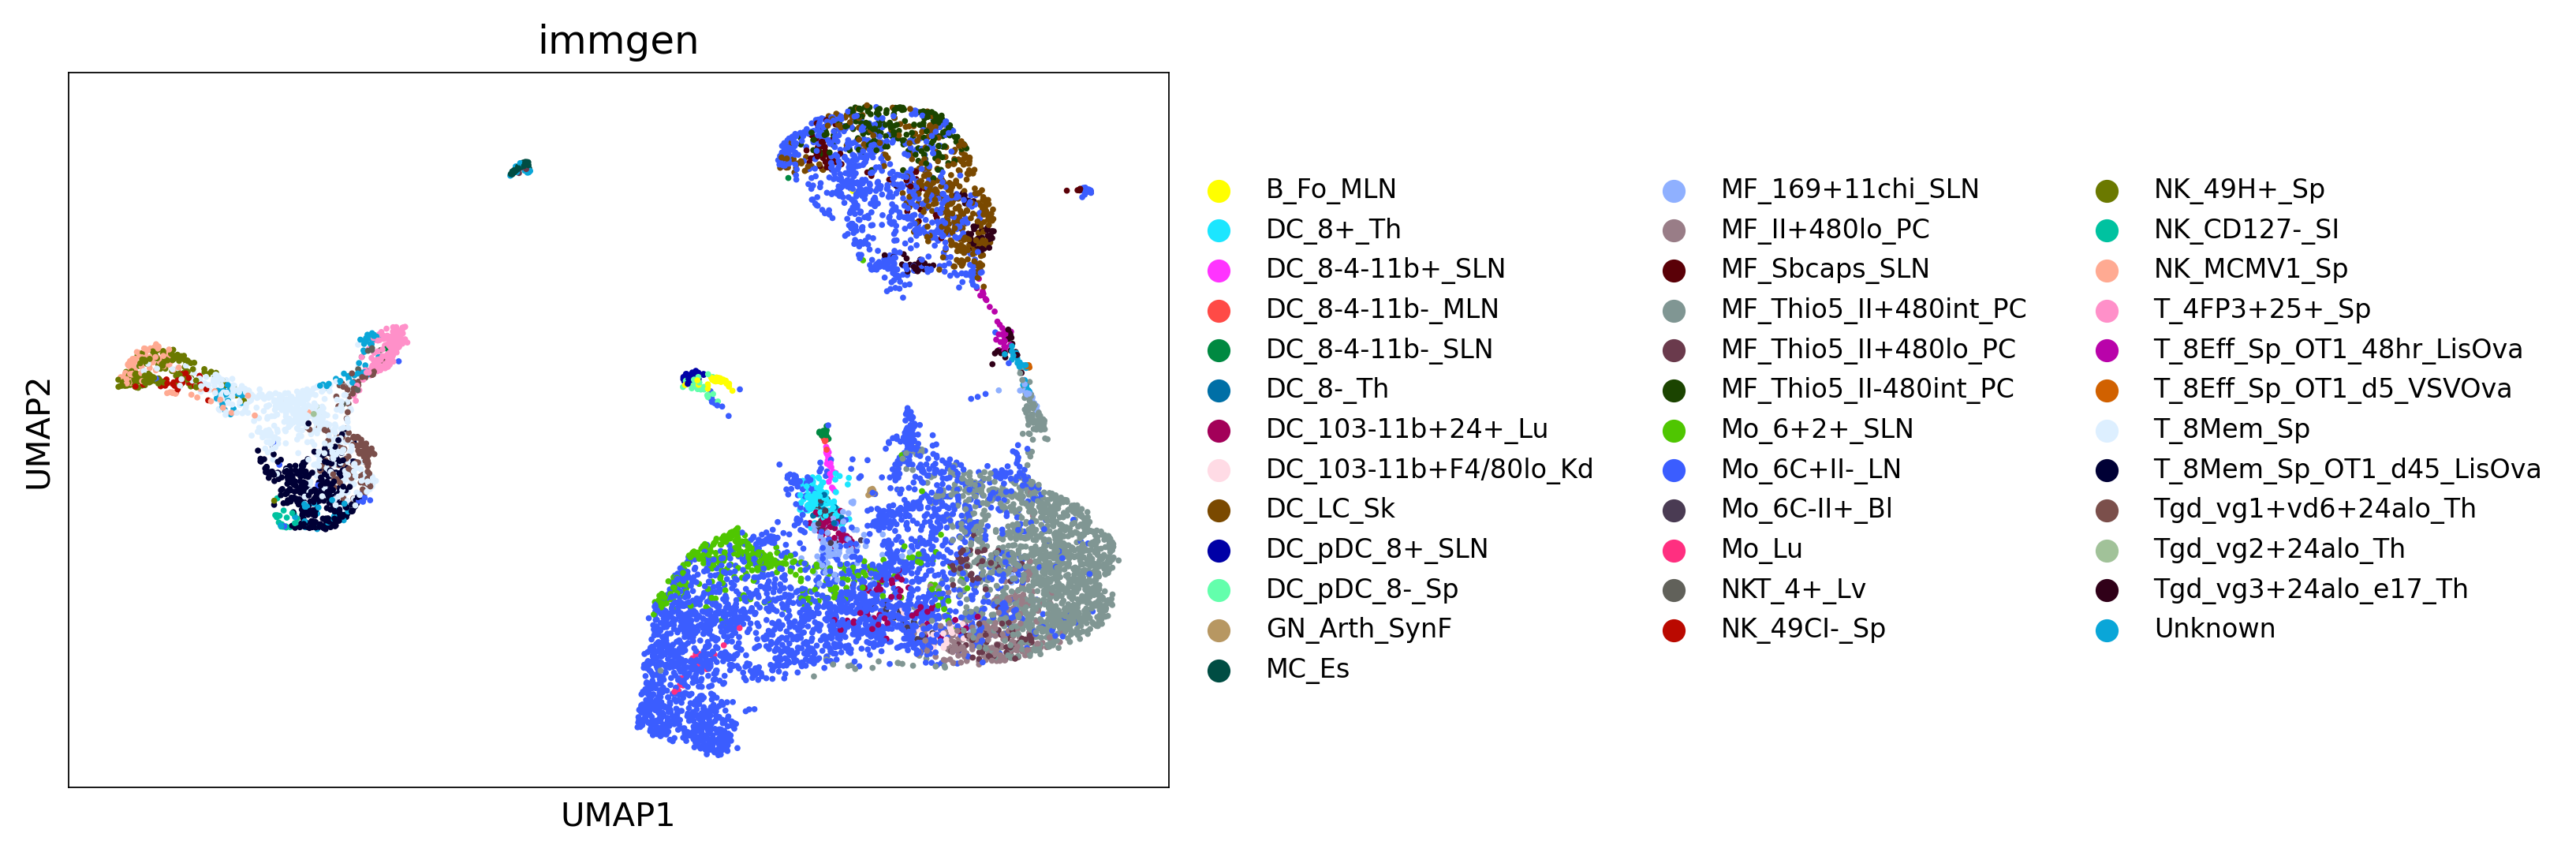

In [35]:
sc.pl.umap(adata['allntova'], color = 'immgen', legend_fontsize = 8)

#### Zilionis

In [36]:
var_names = np.intersect1d(adata['allntova'][:, gmask['allntova']].var_names, centroids['zilionis'].columns)
len(var_names)

/Users/mariusmessemaker/miniconda3/envs/py36-sc/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


13756

In [37]:
# Predict class label for each cell i, or 'Unknown' if no class was predicted for a group of cells: 
pred_proba_threshold = mm.adata_classifier(mm.fit_multinomialNb, adata['allntova'][: , var_names], centroids = centroids['zilionis'].loc[:, var_names], predict = False, 
                                           group_xtest = 'sc_leiden_res_48.75', log = False, threshold = 0.1)

/Users/mariusmessemaker/miniconda3/envs/py36-sc/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/Users/mariusmessemaker/miniconda3/envs/py36-sc/lib/python3.6/site-packages/sklearn/naive_bayes.py:512: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Started fitting...
Started predicting...
Threshold: 0.1


In [38]:
pred_proba_threshold['prediction'].unique()

array(['T3', 'Mac1', 'MonoDC', 'Mac2', 'T1', 'DC2', 'Mono3', 'NK cells',
       'Mono1', 'DC1', 'DC3', 'Mono2', 'T2', 'pDC', 'N1', 'B cells',
       'Basophils'], dtype=object)

In [40]:
# Join predicted class label for each cell i to .obs
pred_proba_threshold.columns = ['zilionis']
adata['allntova'].obs = adata['allntova'].obs.join(pred_proba_threshold)

/Users/mariusmessemaker/miniconda3/envs/py36-sc/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
... storing 'zilionis' as categorical


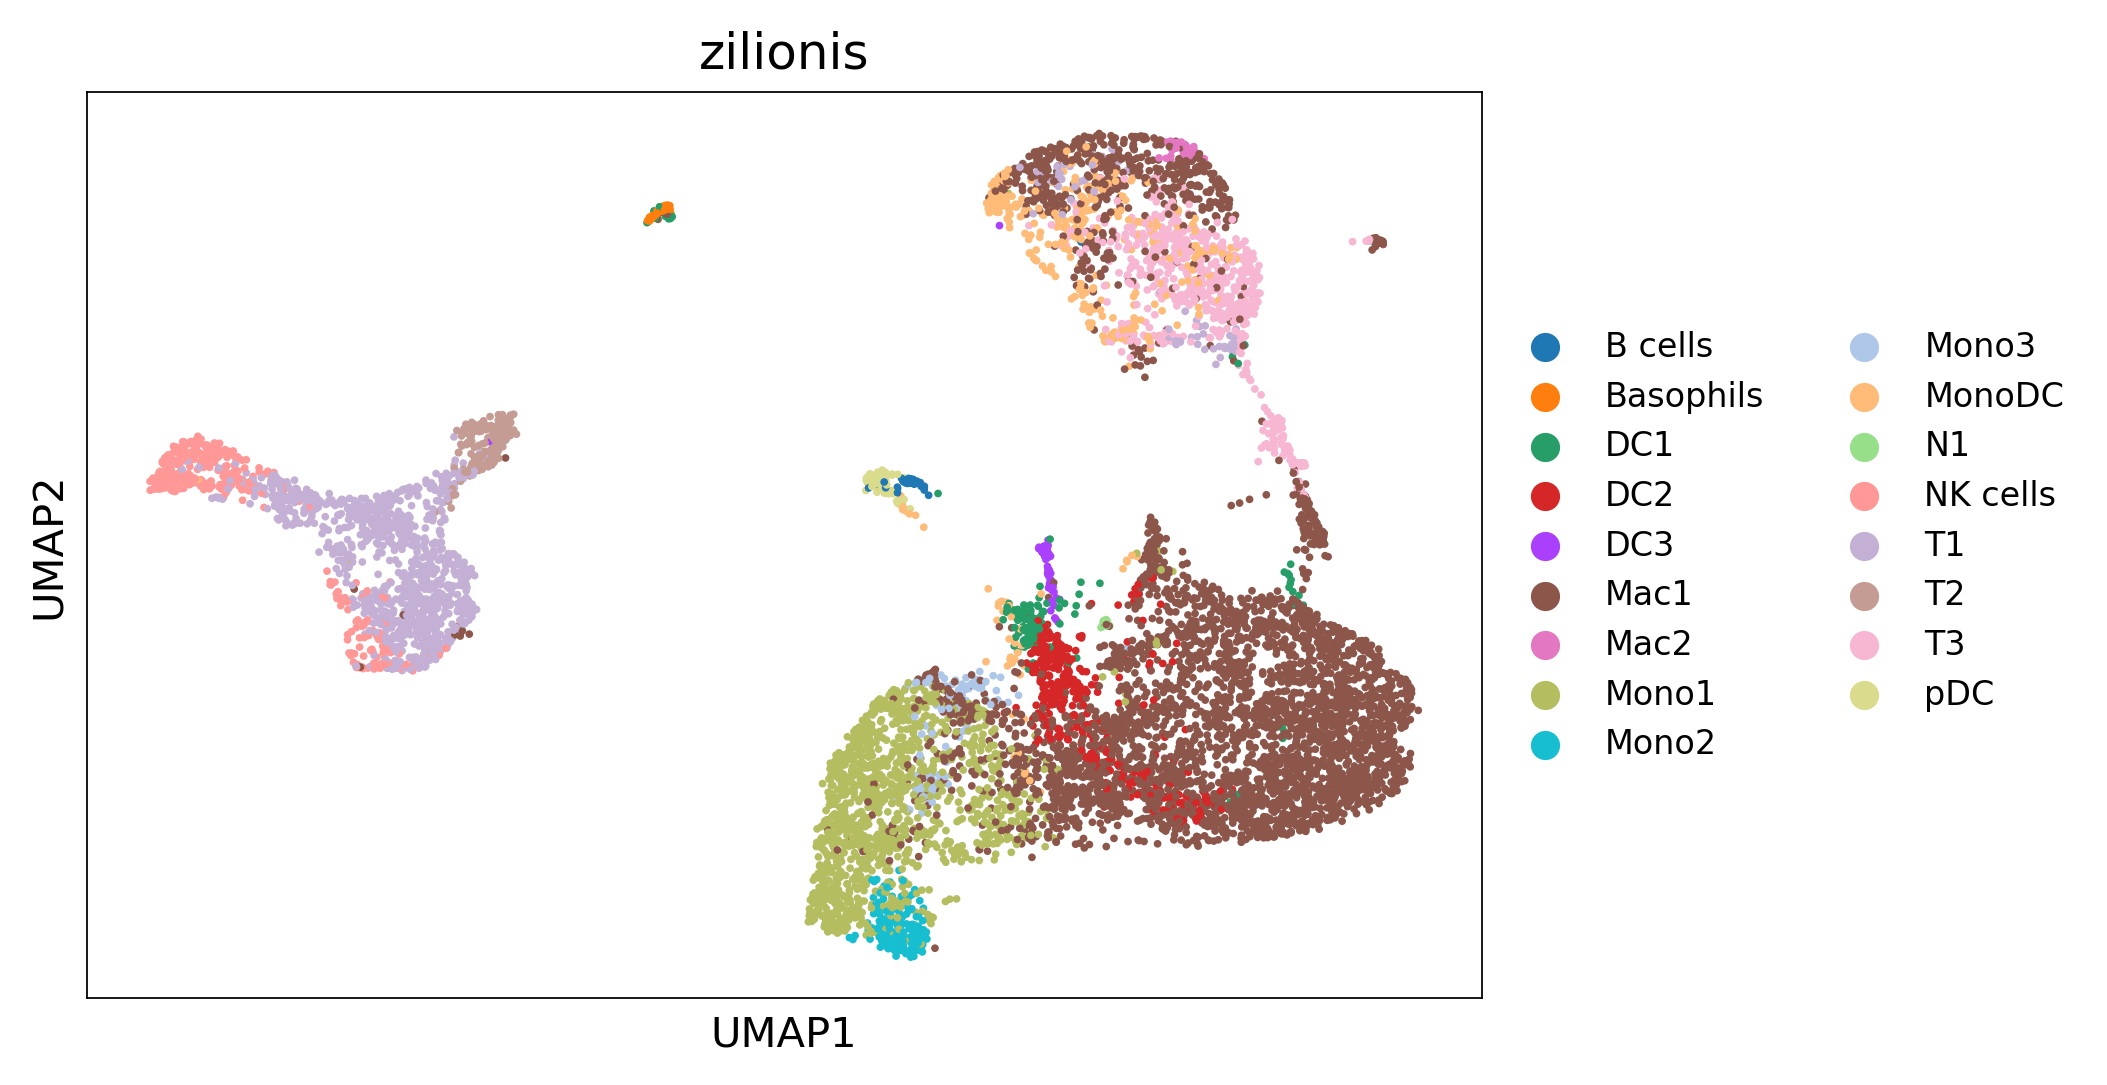

In [41]:
sc.pl.umap(adata['allntova'], color = 'zilionis', legend_fontsize = 8)

#### Maier 

In [42]:
var_names = np.intersect1d(adata['allntova'][:, gmask['allntova']].var_names, centroids['maier'].columns)
len(var_names)

/Users/mariusmessemaker/miniconda3/envs/py36-sc/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


10439

In [72]:
# Predict class label for each cell i, or 'Unknown' if no class was predicted for a group of cells: 
pred_proba_threshold = mm.adata_classifier(mm.fit_multinomialNb, adata['allntova'][: , var_names], centroids = centroids['maier'].loc[:, var_names], predict = False, 
                                           group_xtest = 'sc_leiden_res_48.75', log = False, threshold = 0.8)

Started fitting...
Started predicting...
Threshold: 0.8


/Users/mariusmessemaker/miniconda3/envs/py36-sc/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/Users/mariusmessemaker/miniconda3/envs/py36-sc/lib/python3.6/site-packages/sklearn/naive_bayes.py:512: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


In [74]:
pred_proba_threshold['prediction'].unique()

array(['DC2', 'Unknown', 'mregDC'], dtype=object)

In [75]:
# Join predicted class label for each cell i to .obs
pred_proba_threshold.columns = ['maier']
adata['allntova'].obs = adata['allntova'].obs.join(pred_proba_threshold)

/Users/mariusmessemaker/miniconda3/envs/py36-sc/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
... storing 'maier' as categorical


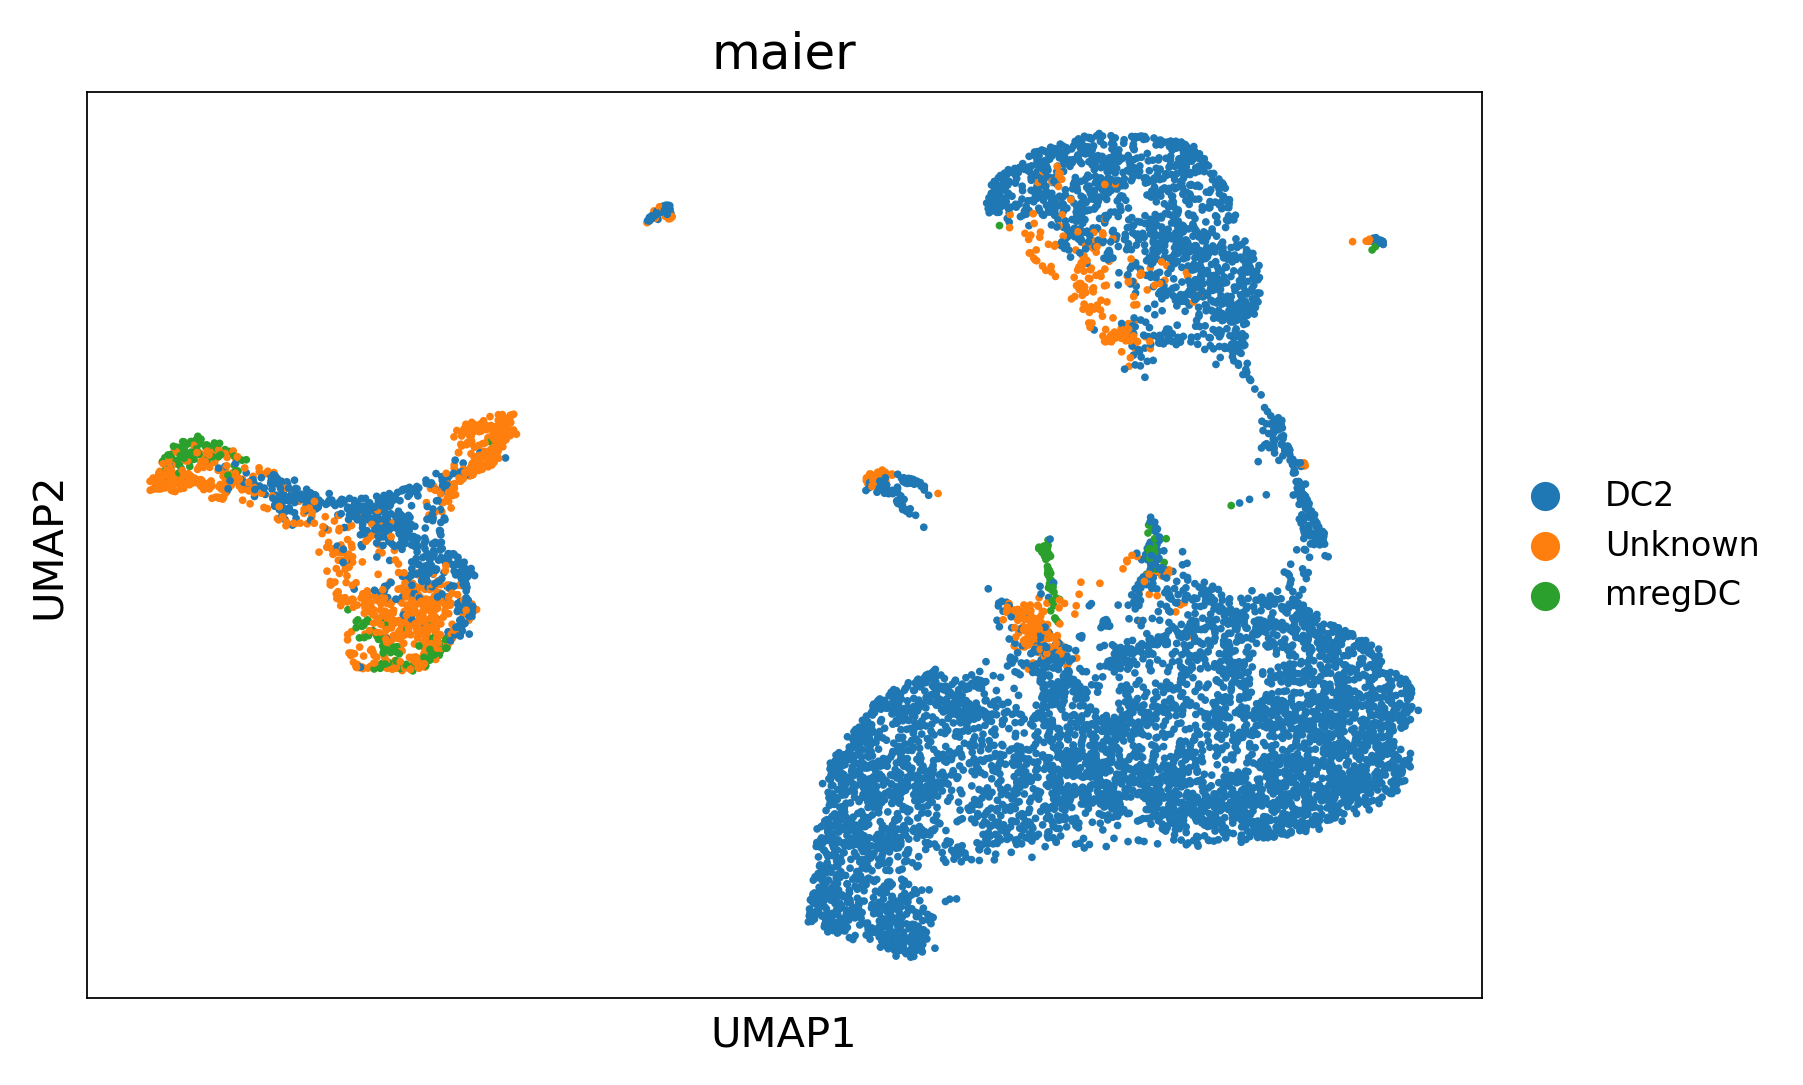

In [76]:
sc.pl.umap(adata['allntova'], color = 'maier', legend_fontsize = 8)

#### Zhang

In [77]:
var_names = np.intersect1d(adata['allntova'][:, gmask['allntova']].var_names, centroids['zhangcd40'].columns)
len(var_names)

/Users/mariusmessemaker/miniconda3/envs/py36-sc/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


11900

In [78]:
# Predict class label for each cell i, or 'Unknown' if no class was predicted for a group of cells: 
pred_proba_threshold = mm.adata_classifier(mm.fit_multinomialNb, adata['allntova'][: , var_names], centroids = centroids['zhangcd40'].loc[:, var_names], predict = False, 
                                           group_xtest = 'sc_leiden_res_48.75', log = False, threshold = 0.2)

/Users/mariusmessemaker/miniconda3/envs/py36-sc/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/Users/mariusmessemaker/miniconda3/envs/py36-sc/lib/python3.6/site-packages/sklearn/naive_bayes.py:512: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Started fitting...
Started predicting...
Threshold: 0.2


In [79]:
pred_proba_threshold['prediction'].unique()

array(['mT12_CD8_Tex-Mki67', 'mM08_Mono-Ly6c2', 'mM15_Macro-Vegfa',
       'mM14_Macro-Mgl2', 'mL01_NKT-Cd163l1', 'mT03_CD4_Th-Bhlhe40',
       'mT11_CD8_Tex-Lag3', 'mM12_Macro-Maf', 'mM04_cDC2-Cd209a',
       'mM11_Macro-Mafb', 'mM09_Mono-Nr4a1', 'mM06_cDC1-Clec9a',
       'mM07_cDC1-Ccl22', 'mI01_NK-Klrb1c', 'mM10_Mono-Itgal',
       'mT04_CD4_Treg-Foxp3', 'mL02_IEL-Cd7', 'mM03_pDC-Siglech',
       'mT08_CD8_Tcm-Ifit3', 'mM02_Neutrophil-Csf3r', 'mT07_CD8_Tn-Ccr7',
       'mT10_CD8_Trm-Cxcr6', 'mB01_BCell-Cd79b', 'mM13_Macro-Ccl12',
       'mT06_CD4_Tcm-Tcf7', 'mM01_Mast-Cpa3'], dtype=object)

In [81]:
# Join predicted class label for each cell i to .obs
pred_proba_threshold.columns = ['zhangcd40']
adata['allntova'].obs = adata['allntova'].obs.join(pred_proba_threshold)

/Users/mariusmessemaker/miniconda3/envs/py36-sc/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
... storing 'zhangcd40' as categorical


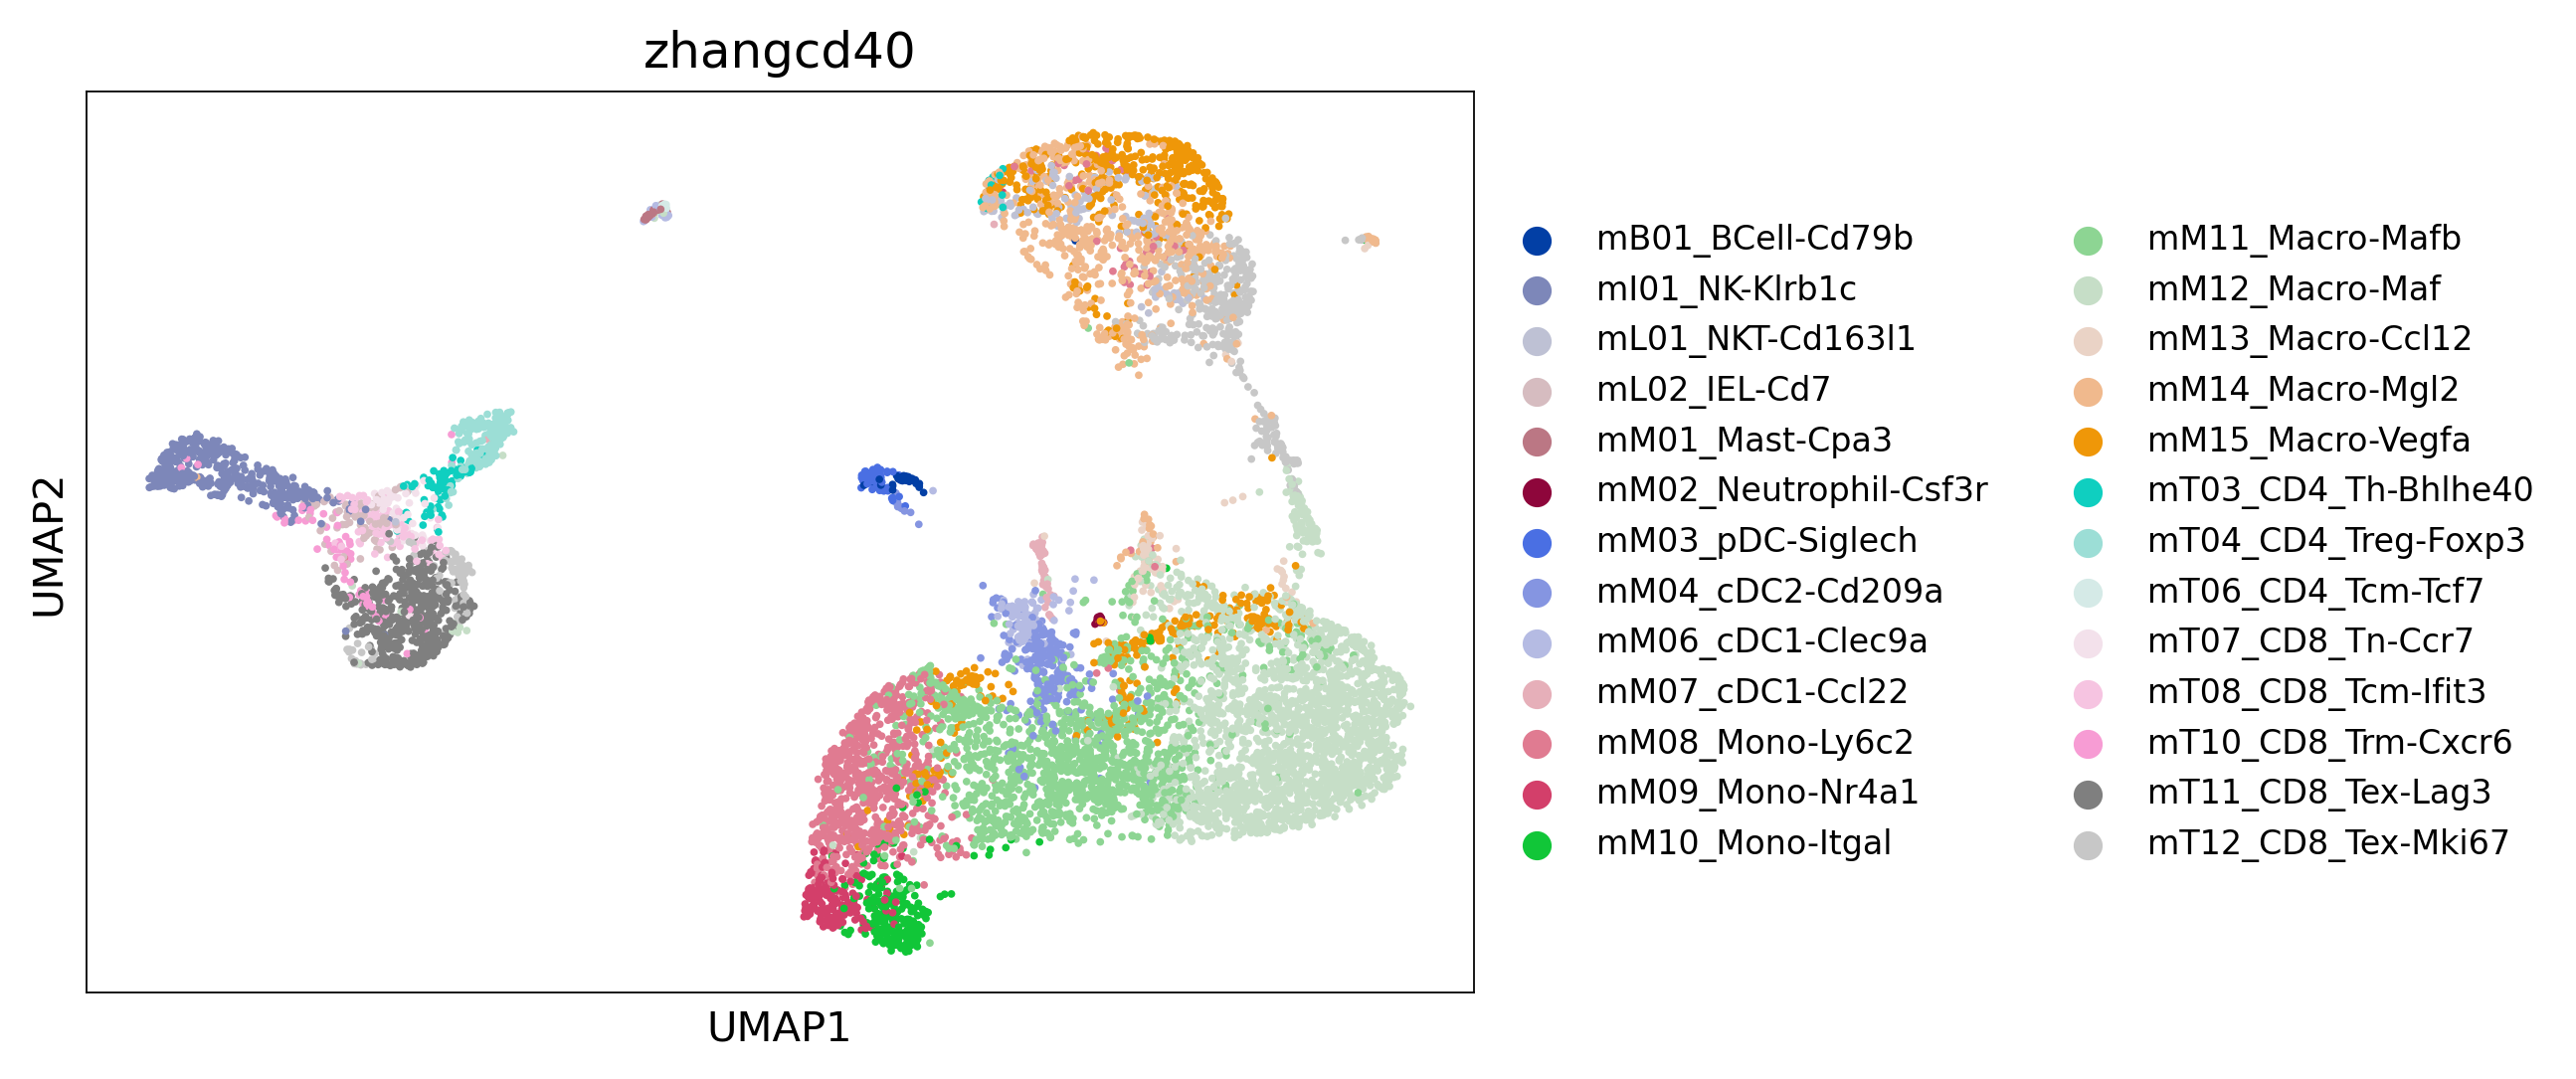

In [82]:
sc.pl.umap(adata['allntova'], color = 'zhangcd40', legend_fontsize = 8)

#### Miller 

In [83]:
var_names = np.intersect1d(adata['allntova'][:, gmask['allntova']].var_names, centroids['miller'].columns)
len(var_names)

/Users/mariusmessemaker/miniconda3/envs/py36-sc/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


10483

In [84]:
# Predict class label for each cell i, or 'Unknown' if no class was predicted for a group of cells: 
pred_proba_threshold = mm.adata_classifier(mm.fit_multinomialNb, adata['allntova'][: , var_names], centroids = centroids['miller'].loc[:, var_names], predict = False, 
                                           group_xtest = 'sc_leiden_res_48.75', log = False, threshold = 0.75)

Started fitting...
Started predicting...
Threshold: 0.75


/Users/mariusmessemaker/miniconda3/envs/py36-sc/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/Users/mariusmessemaker/miniconda3/envs/py36-sc/lib/python3.6/site-packages/sklearn/naive_bayes.py:512: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


In [85]:
# Note grey is an unannotated grey colored cluster in the Miller dataset. 
pred_proba_threshold['prediction'].unique()

array(['Unknown', 'grey', 'CD8 T E', 'CD8 T P E'], dtype=object)

In [86]:
# Join predicted class label for each cell i to .obs
pred_proba_threshold.columns = ['miller']
adata['allntova'].obs = adata['allntova'].obs.join(pred_proba_threshold)

/Users/mariusmessemaker/miniconda3/envs/py36-sc/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
... storing 'miller' as categorical


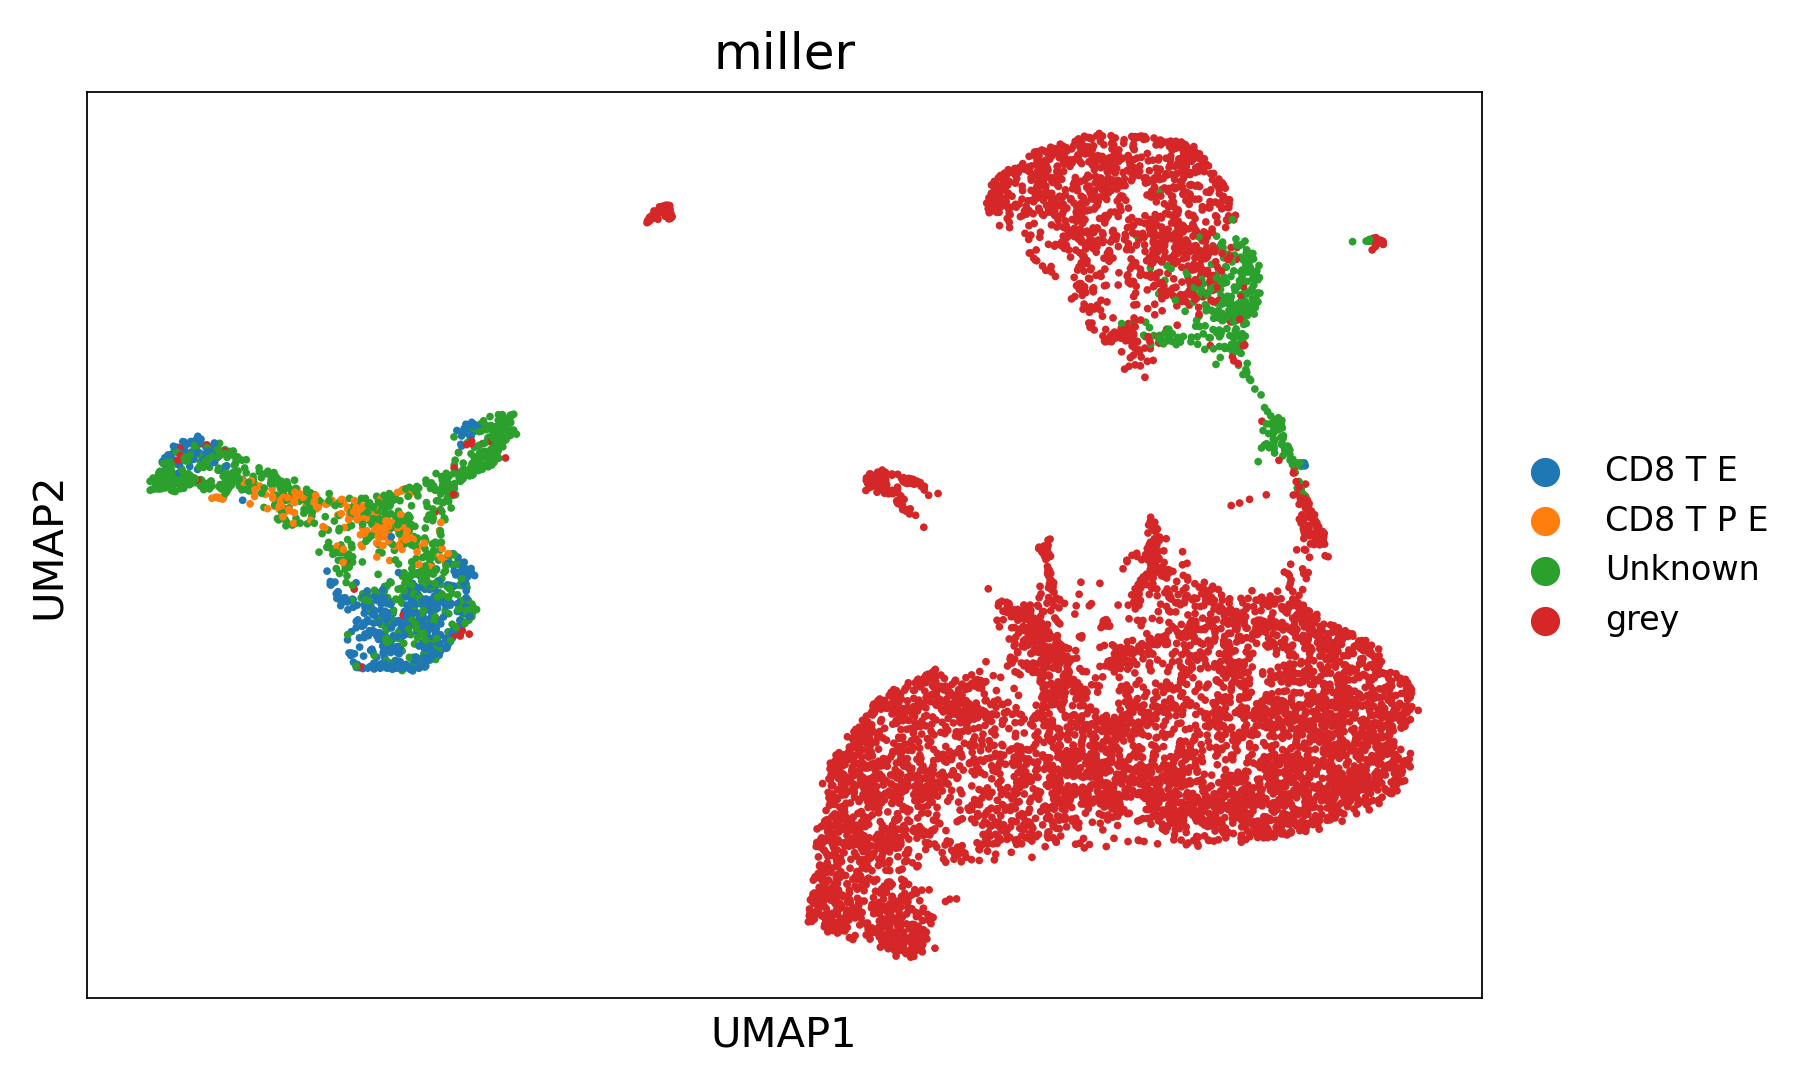

In [87]:
sc.pl.umap(adata['allntova'], color = 'miller', legend_fontsize = 8)

#### Miller LCMV 

In [90]:
var_names = np.intersect1d(adata['allntova'][:, gmask['allntova']].var_names, centroids['millerlcmv'].columns)
len(var_names)

/Users/mariusmessemaker/miniconda3/envs/py36-sc/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


10797

In [92]:
# Predict class label for each cell i, or 'Unknown' if no class was predicted for a group of cells: 
pred_proba_threshold = mm.adata_classifier(mm.fit_multinomialNb, adata['allntova'][: , var_names], centroids = centroids['millerlcmv'].loc[:, var_names], predict = False, 
                                           group_xtest = 'sc_leiden_res_48.75', log = False, threshold = 0.5)

/Users/mariusmessemaker/miniconda3/envs/py36-sc/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/Users/mariusmessemaker/miniconda3/envs/py36-sc/lib/python3.6/site-packages/sklearn/naive_bayes.py:512: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Started fitting...
Started predicting...
Threshold: 0.5


In [93]:
# Note grey is an unannotated grey colored cluster in the Miller dataset. 
pred_proba_threshold['prediction'].unique()

array(['CD8 T Pr', 'Unknown', 'CD8 T P', 'CD8 T Ef', 'Cluster 3',
       'CD8 T E'], dtype=object)

In [94]:
# Join predicted class label for each cell i to .obs
pred_proba_threshold.columns = ['millerlcmv']
adata['allntova'].obs = adata['allntova'].obs.join(pred_proba_threshold)

/Users/mariusmessemaker/miniconda3/envs/py36-sc/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
... storing 'millerlcmv' as categorical


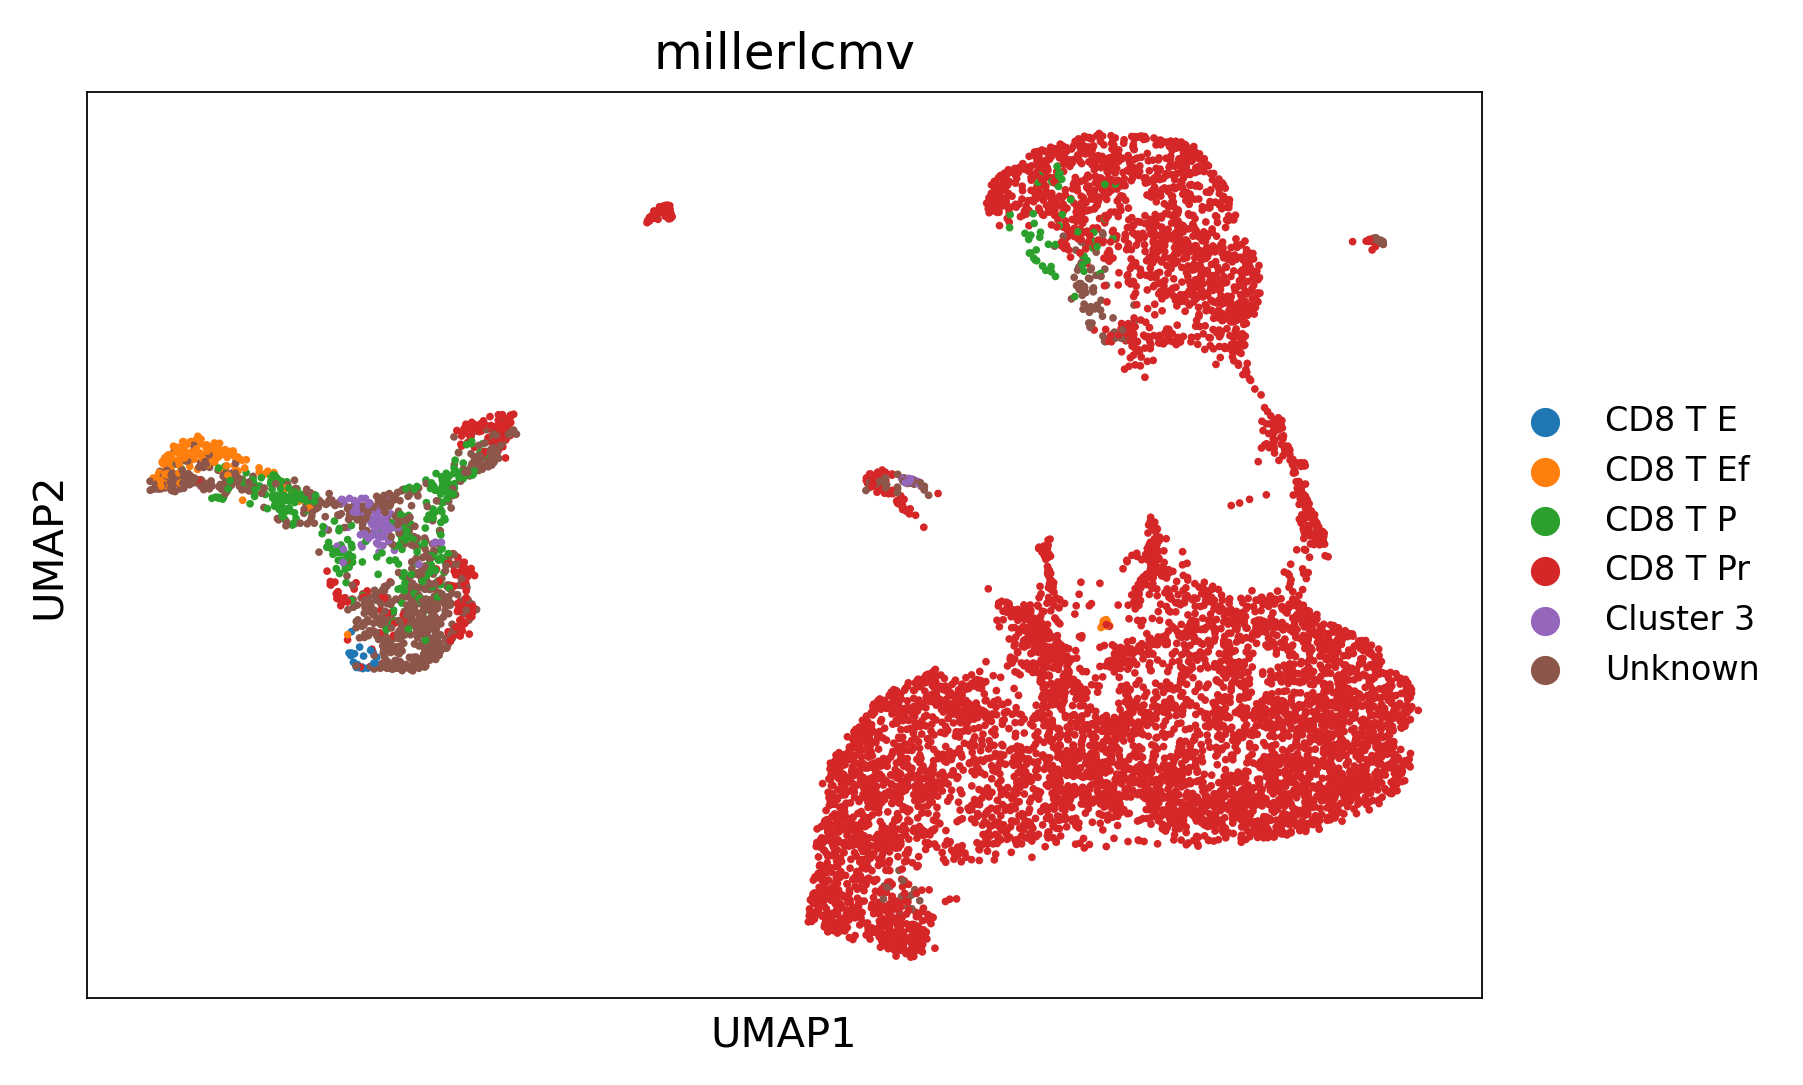

In [95]:
sc.pl.umap(adata['allntova'], color = 'millerlcmv', legend_fontsize = 8)

## Plot marker genes cell states  

In [96]:
marker_genes = pd.read_excel('/Users/mariusmessemaker/Documents/Project/d4m3a/mouse_state_marker_genes.xlsx')
marker_genes

,Cell state,Marker gene
0,CD8 T E,Cd8a
1,CD8 T E,Ifng
2,CD8 T E,Gzmk
3,CD8 T E,Pdcd1
4,CD8 T E,Havcr2
...,...,...
105,Matrixfibroblast,Col14a1
106,Myofibroblast,Mustn1
107,Myofibroblast,Tagln
108,Mesenchymal,Hmgb2


In [107]:
for state, gene in zip(marker_genes['Cell state'], marker_genes['Marker gene']):
    if os.path.isdir('./outputs/' + state) == False:
        os.mkdir('./outputs/' + state)
    if gene in adata['allntova'].var_names:
        fig = sc.pl.umap(adata['allntova'], color = gene, vmin = 0.1, vmax = 'p99', 
                         cmap = mm.custom_colormap(['#000000','#00ff00']), return_fig=True)
        fig.savefig('./outputs/' + state + '/' + gene + '.pdf')
        plt.close()
    else:
        print(gene, 'not in .var_names')

Tek not in .var_names
Col13a1 not in .var_names
Cerulean  not in .var_names
